# Credit Card Fraud EDA
This notebook performs detailed exploratory data analysis (EDA) on the Kaggle Credit Card Fraud dataset to uncover insights beyond formal modeling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('creditcard.csv')
# Feature engineering
df['LogAmount'] = np.log1p(df['Amount'])

## 1. Missing Values & Summary Statistics

In [3]:
print('Missing values per column:')
print(df.isnull().sum())
print('\nSummary statistics:')
print(df.describe())

Missing values per column:
Time         0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V12          0
V13          0
V14          0
V15          0
V16          0
V17          0
V18          0
V19          0
V20          0
V21          1
V22          1
V23          1
V24          1
V25          1
V26          1
V27          1
V28          1
Amount       1
Class        1
LogAmount    1
dtype: int64

Summary statistics:
                Time             V1             V2             V3  \
count  109025.000000  109025.000000  109025.000000  109025.000000   
mean    44645.276707      -0.256883      -0.025148       0.682026   
std     17910.956447       1.851918       1.646552       1.312689   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     34466.000000      -1.022536      -0.594704       0.176662   
50%     46486.000000      -0.260725       0.0

## 2. Class Distribution

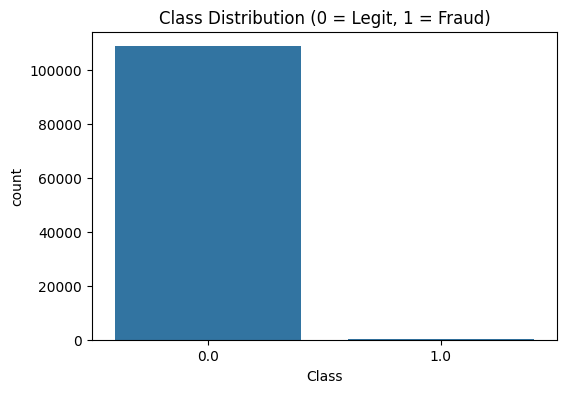

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

## 3. Distribution of Log(Amount)

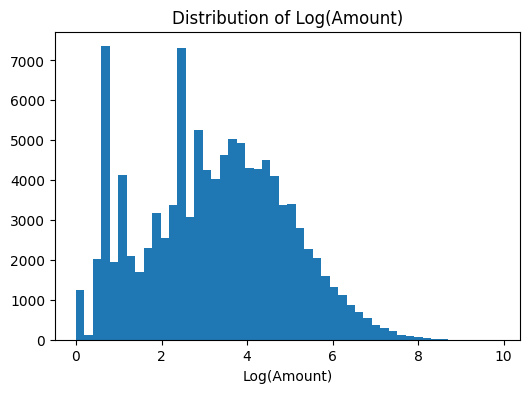

In [5]:
plt.figure(figsize=(6,4))
plt.hist(df['LogAmount'], bins=50)
plt.title('Distribution of Log(Amount)')
plt.xlabel('Log(Amount)')
plt.show()

## 4. Distribution of Transaction Time

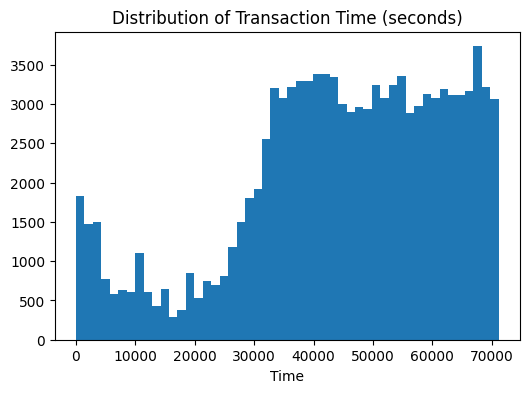

In [6]:
plt.figure(figsize=(6,4))
plt.hist(df['Time'], bins=50)
plt.title('Distribution of Transaction Time (seconds)')
plt.xlabel('Time')
plt.show()

## 5. Boxplot of Log(Amount) by Class

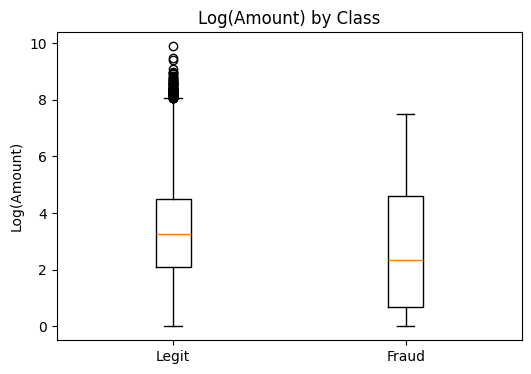

In [48]:
legit = df[df['Class']==0]['LogAmount']
legit = df[df['Class']==0]['LogAmount']
fraud = df[df['Class']==1]['LogAmount']
plt.figure(figsize=(6,4))
plt.boxplot([legit, fraud], tick_labels=['Legit', 'Fraud'])
plt.title('Log(Amount) by Class')
plt.ylabel('Log(Amount)')
plt.show()
plt.show()

## 6. Top 10 Features by Absolute Correlation with Class

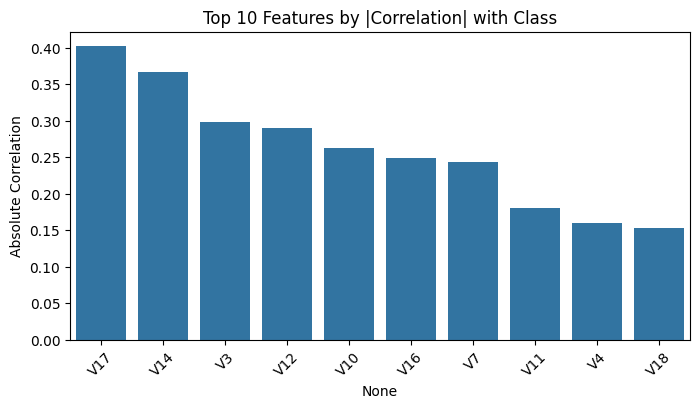

In [8]:
corr = df.corr()['Class'].abs().drop('Class')
top10 = corr.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top10.index, y=top10.values)
plt.title('Top 10 Features by |Correlation| with Class')
plt.xticks(rotation=45)
plt.ylabel('Absolute Correlation')
plt.show()

## 7. Mean Feature Values by Class for Top Features

<Figure size 800x600 with 0 Axes>

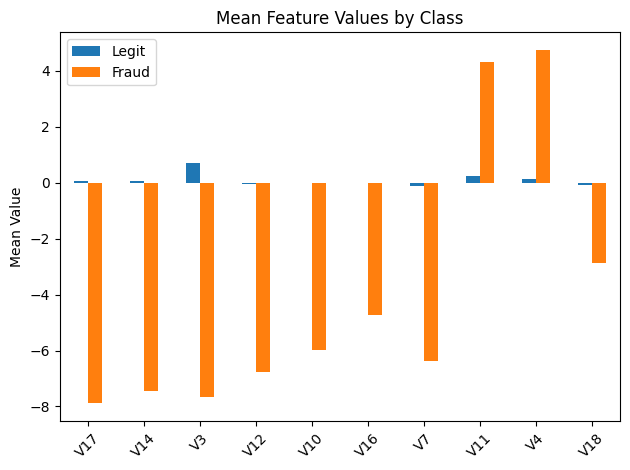

In [9]:
top_feats = top10.index.tolist()
means = df.groupby('Class')[top_feats].mean().T
plt.figure(figsize=(8,6))
means.plot(kind='bar')
plt.title('Mean Feature Values by Class')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(['Legit','Fraud'])
plt.tight_layout()
plt.show()

## 8. Transactions per Hour by Class

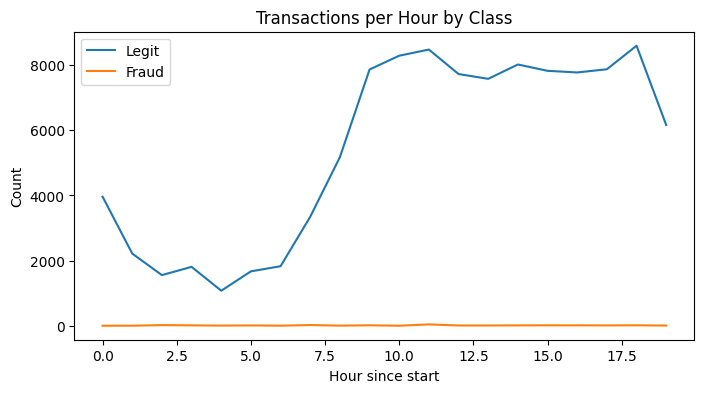

In [10]:
df['Hour'] = (df['Time'] // 3600).astype(int)
hourly = df.groupby(['Hour','Class']).size().unstack(fill_value=0)
plt.figure(figsize=(8,4))
plt.plot(hourly.index, hourly[0], label='Legit')
plt.plot(hourly.index, hourly[1], label='Fraud')
plt.title('Transactions per Hour by Class')
plt.xlabel('Hour since start')
plt.ylabel('Count')
plt.legend()
plt.show()

## 9. Correlation Heatmap of Top Features

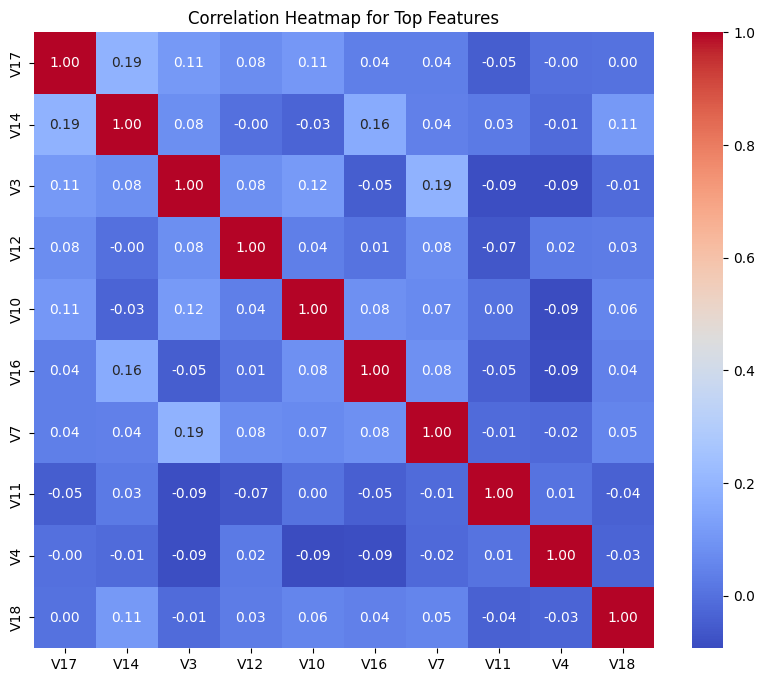

In [11]:
# Compute correlations for top features
top_feats = top10.index.tolist()  # from earlier cell
plt.figure(figsize=(10, 8))
sns.heatmap(df[top_feats].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap for Top Features')
plt.show()

## 10. Pairplot of Key Features

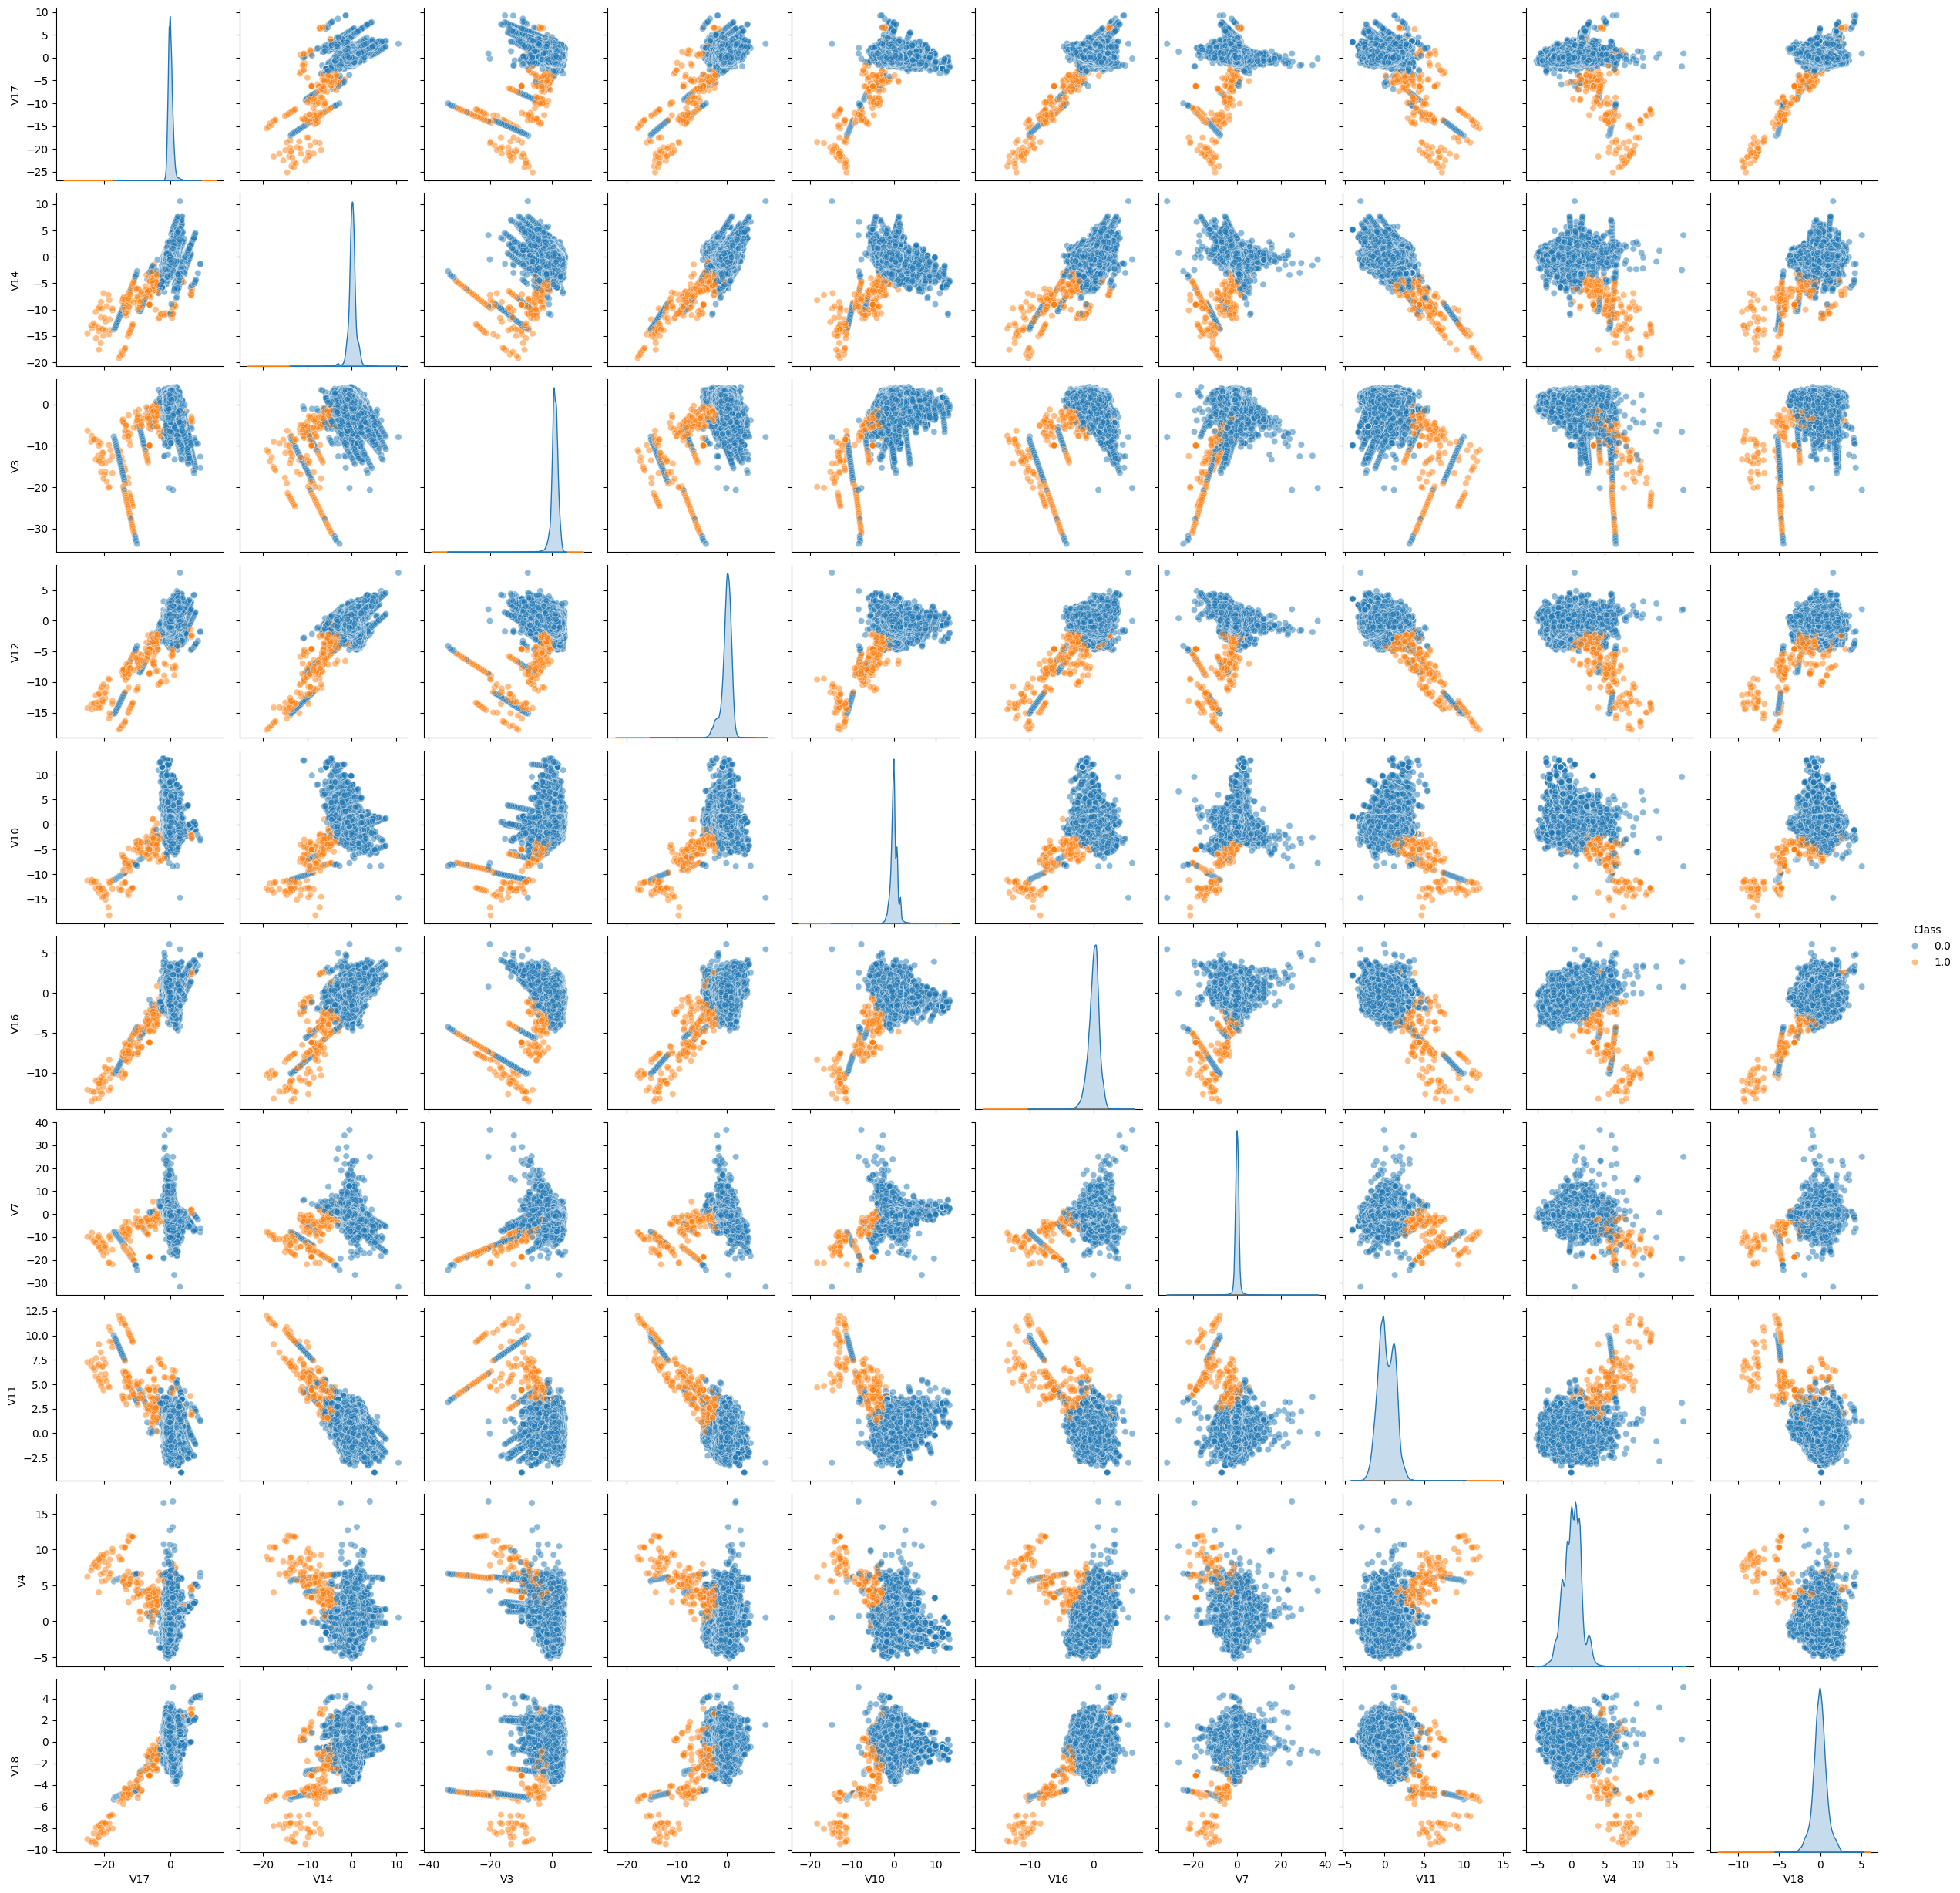

In [12]:
# Pairplot for top features to explore interactions
sns.pairplot(df[top_feats + ['Class']], hue='Class', vars=top_feats, plot_kws={'alpha':0.5}, diag_kind='kde')
plt.show()

## 11. Scatter Plot: Log(Amount) vs V17 by Class

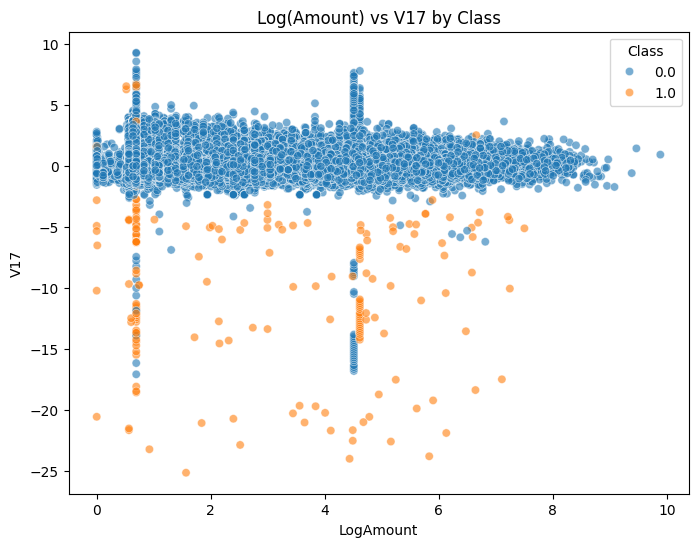

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LogAmount', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('Log(Amount) vs V17 by Class')
plt.show()

## 12. Cumulative Fraud Transactions Over Time

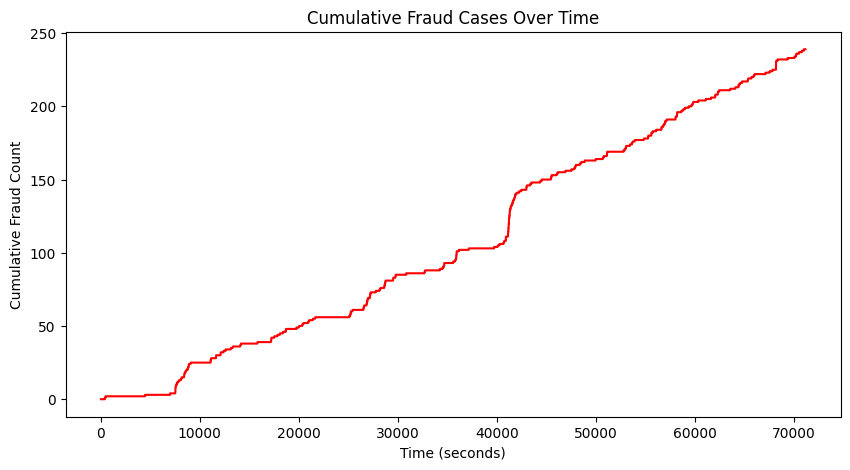

In [14]:
# Cumulative sum of fraud cases over time
df_sorted = df.sort_values('Time')
df_sorted['CumulativeFraud'] = df_sorted['Class'].cumsum()
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['Time'], df_sorted['CumulativeFraud'], color='red')
plt.title('Cumulative Fraud Cases Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Fraud Count')
plt.show()

## 13. Feature Interaction: V14 vs V17 Colored by Class

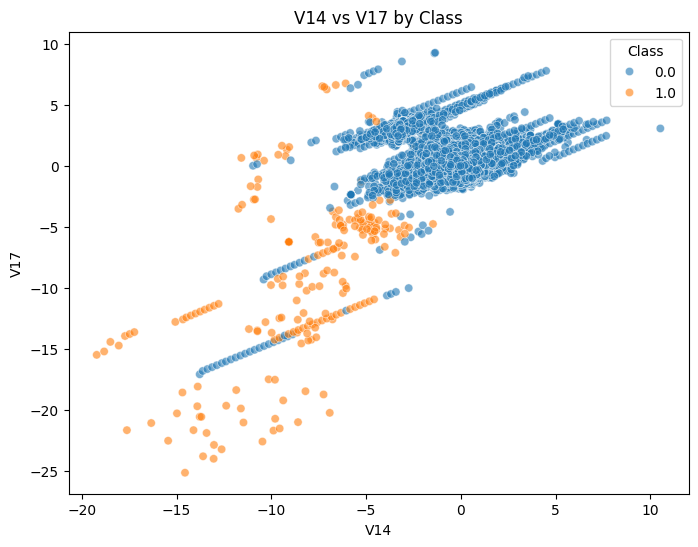

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='V14', y='V17', hue='Class', data=df, alpha=0.6)
plt.title('V14 vs V17 by Class')
plt.show()

## 14. Fraud Rate by Transaction Amount Bins

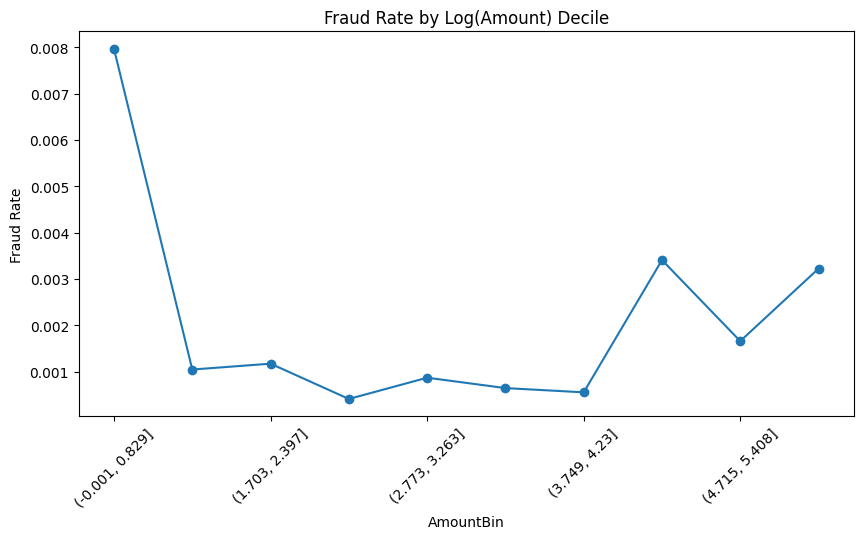

In [45]:
# Create bins for LogAmount and compute fraud rate
df['AmountBin'] = pd.qcut(df['LogAmount'], q=10)
bin_rates = df.groupby('AmountBin',observed=True)['Class'].mean()
plt.figure(figsize=(10,5))
bin_rates.plot(marker='o')
plt.title('Fraud Rate by Log(Amount) Decile')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()

## 15. Hour-of-Day Fraud Rate

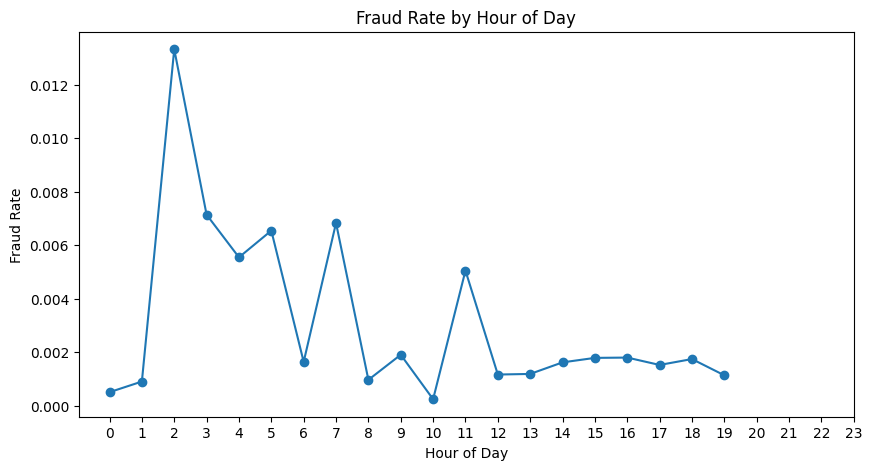

In [17]:
# Convert to hour of day and compute fraud rate
df['Hour24'] = ((df['Time'] // 3600) % 24).astype(int)
hourly_rate = df.groupby('Hour24')['Class'].mean()
plt.figure(figsize=(10,5))
hourly_rate.plot(marker='o')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.xticks(range(0,24))
plt.show()

## 16. PCA Projection of Transactions

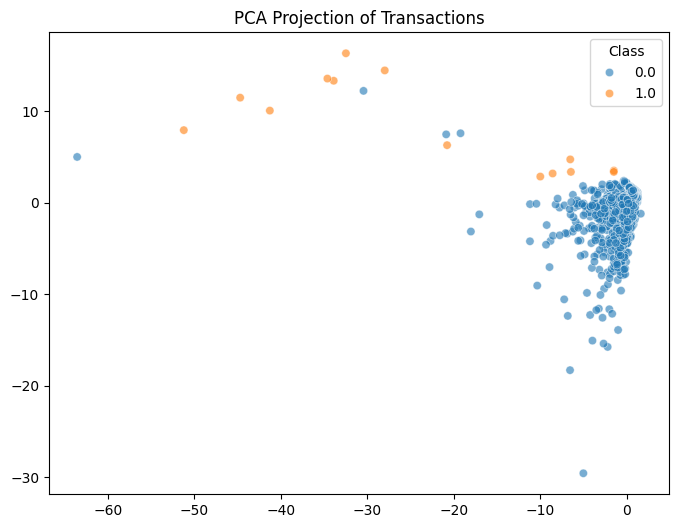

In [18]:
from sklearn.decomposition import PCA
# Sample for performance
sample = df.sample(n=5000, random_state=42)
pca = PCA(n_components=2, random_state=42)
coords = pca.fit_transform(sample[[f'V{i}' for i in range(1,29)]])
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('PCA Projection of Transactions')
plt.show()

## 17. t-SNE Projection of Transactions

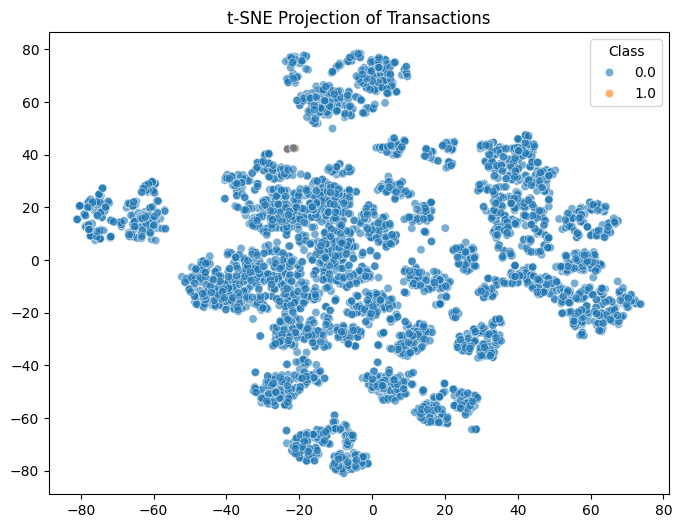

In [41]:
from sklearn.manifold import TSNE
# Sample subset for performance
sample = df.sample(n=5000, random_state=42)
features = sample[[f'V{i}' for i in range(1,29)]].values
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
coords = tsne.fit_transform(features)
plt.figure(figsize=(8,6))
sns.scatterplot(x=coords[:,0], y=coords[:,1], hue=sample['Class'], alpha=0.6)
plt.title('t-SNE Projection of Transactions')
plt.show()

## 18. Violin Plots of Key Features by Class

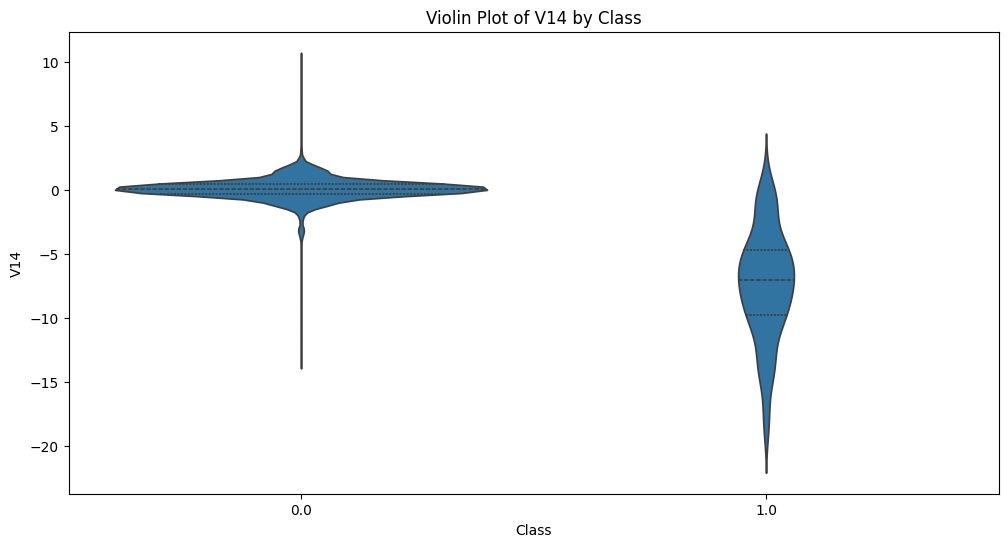

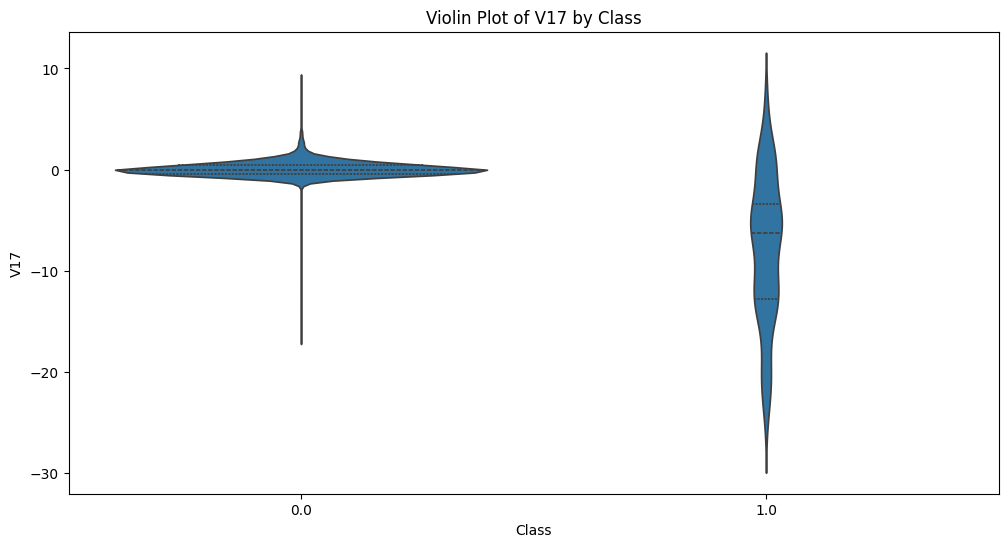

In [23]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V14', data=df, inner='quartile')
plt.title('Violin Plot of V14 by Class')
plt.show()
plt.figure(figsize=(12,6))
sns.violinplot(x='Class', y='V17', data=df, inner='quartile')
plt.title('Violin Plot of V17 by Class')
plt.show()

## 19. Anomaly Score Distribution (Isolation Forest)

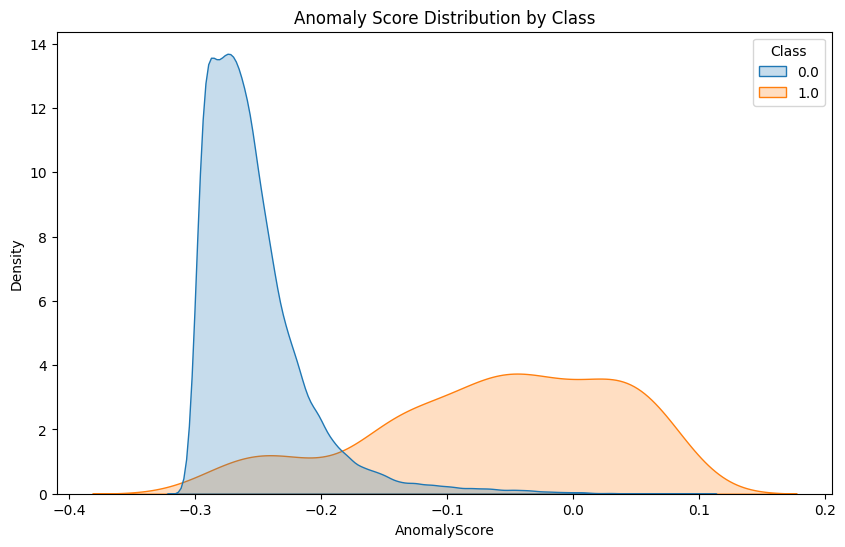

In [42]:
from sklearn.ensemble import IsolationForest
# Fit Isolation Forest on features + engineered columns
features = df[[f'V{i}' for i in range(1,29)] + ['LogAmount', 'Time']]
iso = IsolationForest(n_estimators=100, contamination=df['Class'].mean(), random_state=42)
iso.fit(features)
df['AnomalyScore'] = -iso.decision_function(features)
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='AnomalyScore', hue='Class', fill=True, common_norm=False)
plt.title('Anomaly Score Distribution by Class')
plt.show()

## 20. ROC and Precision-Recall Curves for Isolation Forest Scores

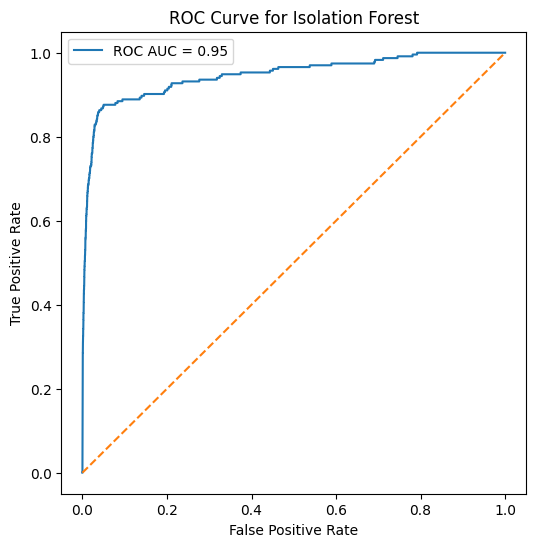

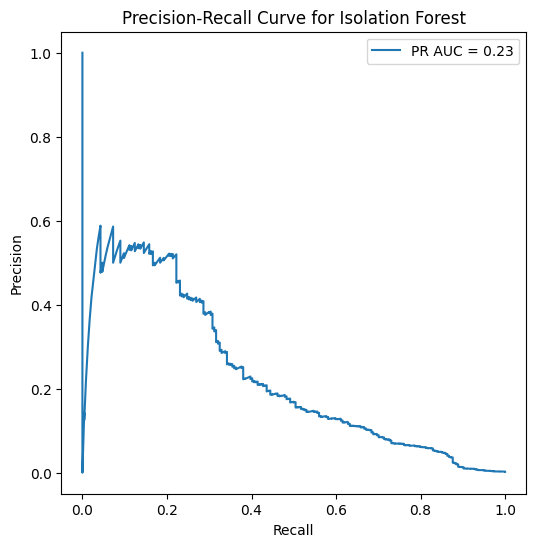

In [44]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ROC Curve
fpr, tpr, _ = roc_curve(df['Class'], df['AnomalyScore'])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.title('ROC Curve for Isolation Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(df['Class'], df['AnomalyScore'])
pr_auc = auc(recall, precision)
plt.figure(figsize=(6,6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve for Isolation Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

## Data Cleaning
Remove duplicates and impute any missing values.

In [49]:
import pandas as pd
# Drop duplicate transactions
df.drop_duplicates(inplace=True)
# Check and fill missing values (forward-fill)
df.ffill(inplace=True)
# Verify no missing values remain
print('Missing values after cleaning:')
print(df.isnull().sum())

Missing values after cleaning:
Time              0
V1                0
V2                0
V3                0
V4                0
V5                0
V6                0
V7                0
V8                0
V9                0
V10               0
V11               0
V12               0
V13               0
V14               0
V15               0
V16               0
V17               0
V18               0
V19               0
V20               0
V21               0
V22               0
V23               0
V24               0
V25               0
V26               0
V27               0
V28               0
Amount            0
Class             0
LogAmount         0
Hour              0
AmountBin         0
Hour24            0
Hour_of_Day       0
Minute_of_Hour    0
Amount_Decile     0
V1_plus_V2        0
AnomalyScore      0
dtype: int64


## Outlier Analysis
Identify and quantify outliers using the IQR method.

In [28]:
import numpy as np
import pandas as pd
numeric_cols = df.select_dtypes(include=[np.number]).drop(columns=['Class']).columns
outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    is_outlier = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
    outlier_summary[col] = int(is_outlier.sum())
pd.Series(outlier_summary).sort_values(ascending=False).head(10)

V28       20059
V27       16012
Amount    11696
V20       11156
V8         9322
V23        9046
V6         8781
V21        6882
V5         6556
V12        6316
dtype: int64

## Feature Engineering
Create new time-based and amount-based features.

In [29]:
import pandas as pd
import numpy as np
# Extract hour and minute of day from Time (seconds)
df['Hour_of_Day'] = ((df['Time'] // 3600) % 24).astype(int)
df['Minute_of_Hour'] = ((df['Time'] % 3600) // 60).astype(int)
# Create amount bins (deciles)
df['Amount_Decile'] = pd.qcut(df['LogAmount'], 10, labels=False)
# Interaction feature example: V1 + V2
df['V1_plus_V2'] = df['V1'] + df['V2']
# Display new feature overview
df[['Hour_of_Day','Minute_of_Hour','Amount_Decile','V1_plus_V2']].head()

Hour_of_Day  Minute_of_Hour  Amount_Decile  V1_plus_V2
0            0               0              8   -1.432588
1            0               0              1    1.458008
2            0               0              9   -2.698517
3            0               0              8   -1.151498
4            0               0              7   -0.280496

## 21. Baseline Classification Model
We select **Logistic Regression** as a baseline classifier for fraud detection due to its simplicity and interpretability.

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Prepare data
# Exclude columns that are interval types or derived analysis results not suitable for direct model input
columns_to_drop = ['Class', 'AmountBin', 'Hour', 'Hour24', 'Hour_of_Day', 'Minute_of_Hour', 'Amount_Decile', 'AnomalyScore']

# Only drop columns if they exist in the dataframe to avoid errors
existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]

X = df.drop(columns=existing_cols_to_drop)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train baseline model
# Increased max_iter to allow the solver more steps to converge, and using scaled data
baseline = LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42)
# Fit on the scaled training data
baseline.fit(X_train_scaled, y_train)

# Predictions & scores
# Predict using the scaled test data
y_pred = baseline.predict(X_test_scaled)
y_proba = baseline.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print('Classification Report:')
print(classification_report(y_test, y_pred, digits=4))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

Classification Report:
              precision    recall  f1-score   support

         0.0     0.9996    0.9795    0.9894     21673
         1.0     0.0806    0.8298    0.1469        47

    accuracy                         0.9791     21720
   macro avg     0.5401    0.9046    0.5682     21720
weighted avg     0.9976    0.9791    0.9876     21720

ROC-AUC Score: 0.9419


### Evaluation Metric Selection & Rationale
- **ROC-AUC**: Measures the classifier’s ability to distinguish fraud vs. legitimate transactions across thresholds. Well-suited for imbalanced datasets because it is insensitive to class proportions.
- **F1-score**: Harmonic mean of precision and recall, balancing false positives and false negatives. Important when both fraud detection sensitivity and precision matter.